Computed covariance matrix shape: (10, 10).
Computed covariance matrix shape: (10, 10).
Computed covariance matrix shape: (10, 10).
Computed covariance matrix shape: (10, 10).
Computed covariance matrix shape: (10, 10).
Computed covariance matrix shape: (10, 10).
Computed covariance matrix shape: (10, 10).
Computed covariance matrix shape: (10, 10).
Computed covariance matrix shape: (10, 10).
Computed covariance matrix shape: (10, 10).
Computed covariance matrix shape: (10, 10).
Computed covariance matrix shape: (10, 10).
Computed covariance matrix shape: (10, 10).
Computed covariance matrix shape: (10, 10).
Computed covariance matrix shape: (10, 10).
Computed covariance matrix shape: (10, 10).
Computed covariance matrix shape: (10, 10).
Computed covariance matrix shape: (10, 10).
Computed covariance matrix shape: (10, 10).
Computed covariance matrix shape: (10, 10).
Computed covariance matrix shape: (10, 10).
Computed covariance matrix shape: (10, 10).
Computed covariance matrix shape

/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (11, 11).
Computed covariance matrix shape: (11, 11).
Computed covariance matrix shape: (11, 11).
Computed covariance matrix shape: (11, 11).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (11, 11).
Computed covariance matrix shape: (11, 11).
Computed covariance matrix shape: (11, 11).
Computed covariance matrix shape: (11, 11).
Computed covariance matrix shape: (11, 11).
Computed covariance matrix shape: (11, 11).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (11, 11).
Computed covariance matrix shape: (11, 11).
Computed covariance matrix shape: (11, 11).
Computed covariance matrix shape: (11, 11).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (11, 11).
Computed covariance matrix shape: (11, 11).
Computed covariance matrix shape: (11, 11).
Computed covariance matrix shape: (11, 11).
Computed covariance matrix shape: (11, 11).
Computed covariance matrix shape: (11, 11).
Computed covariance matrix shape: (11, 11).
Computed covariance matrix shape: (11, 11).
Computed covariance matrix shape: (11, 11).
Computed covariance matrix shape: (11, 11).
Computed covariance matrix shape: (11, 11).
Computed covariance matrix shape: (11, 11).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (11, 11).
Computed covariance matrix shape: (11, 11).
Computed covariance matrix shape: (11, 11).
Computed covariance matrix shape: (11, 11).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (11, 11).
Computed covariance matrix shape: (11, 11).
Computed covariance matrix shape: (11, 11).
Computed covariance matrix shape: (11, 11).
Computed covariance matrix shape: (11, 11).
Computed covariance matrix shape: (11, 11).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (11, 11).
Computed covariance matrix shape: (11, 11).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (11, 11).
Computed covariance matrix shape: (11, 11).
Computed covariance matrix shape: (11, 11).
Computed covariance matrix shape: (11, 11).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (11, 11).
Computed covariance matrix shape: (11, 11).
Computed covariance matrix shape: (11, 11).
Computed covariance matrix shape: (11, 11).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Error optimizing sector portfolio: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Failed to optimize sector classA: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowit

/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Error optimizing sector portfolio: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Failed to optimize sector classA: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'matic', 'btc', 'tusd', 'paxg', 'frax',
       'susd', 'dai', 'usdt'],
      dtype='object')
Skipping rebalance for Markowitz on 2021-06-16 due to insufficient data.
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed c

/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
Traceback (most recent call last):
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/backtesting/Backtesting.py", line 210, in process_portfolio
    portfolio.rebalance(
  File "/

Error optimizing sector portfolio: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Failed to optimize sector classA: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'matic', 'btc', 'tusd', 'paxg', 'frax',
       'susd', 'dai', 'usdt'],
      dtype='object')
Skipping rebalance for Markowitz on 2021-07-08 due to insufficient data.
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed c

/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Error optimizing sector portfolio: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Failed to optimize sector classA: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'matic', 'btc', 'tusd', 'paxg', 'frax',
       'susd', 'dai', 'usdt'],
      dtype='object')
Skipping rebalance for Markowitz on 2021-08-25 due to insufficient data.
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
Traceback (most recent call last):
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/backtesting/Backtesting.py", line 210, in process_portfolio
    portfolio.rebalance(
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/portfolio/Portfolio.py", line 210, in rebalance
    assert np.isclose(new_weights.sum(), 1, 1e-5), (
AssertionError: Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Error optimizing sector portfolio: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Failed to optimize sector classA: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'matic', 'btc', 'tusd', 'paxg', 'frax',
       'susd', 'dai', 'usdt'],
      dtype='object')
Skipping rebalance for Markowitz on 2021-12-17 due to insufficient data.
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
Traceback (most recent call last):
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/backtesting/Backtesting.py", line 210, in process_portfolio
    portfolio.rebalance(
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/portfolio/Portfolio.py", line 210, in rebalance
    assert np.isclose(new_weights.sum(), 1, 1e-5), (
AssertionError: Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Error optimizing sector portfolio: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Failed to optimize sector classA: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'matic', 'btc', 'tusd', 'paxg', 'frax',
       'susd', 'dai', 'usdt'],
      dtype='object')
Skipping rebalance for Markowitz on 2022-01-08 due to insufficient data.
Computed covariance matrix shape: (12, 12).
Computed c

/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
Traceback (most recent call last):
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/backtesting/Backtesting.py", line 210, in process_portfolio
    portfolio.rebalance(
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/portfolio/Portfolio.py", line 210, in rebalance
    assert np.isclose(new_weights.sum(), 1, 1e-5), (
AssertionError: Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Error optimizing sector portfolio: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Failed to optimize sector classA: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'matic', 'btc', 'tusd', 'paxg', 'frax',
       'susd', 'dai', 'usdt'],
      dtype='object')
Skipping rebalance for Markowitz on 2022-01-15 due to insufficient data.
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed c

/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
Traceback (most recent call last):
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/backtesting/Backtesting.py", line 210, in process_portfolio
    portfolio.rebalance(
  File "/

Error optimizing sector portfolio: Solver 'ECOS_BB' failed. Try another solver, or solve with verbose=True for more information.
Failed to optimize sector classA: Solver 'ECOS_BB' failed. Try another solver, or solve with verbose=True for more information.
Computed covariance matrix shape: (12, 12).
Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'matic', 'btc', 'tusd', 'paxg', 'frax',
       'susd', 'dai', 'usdt'],
      dtype='object')
Skipping rebalance for Markowitz on 2022-02-28 due to insufficient data.
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Error optimizing sector portfolio: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Failed to optimize sector classA: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'matic', 'btc', 'tusd', 'paxg', 'frax',
       'susd', 'dai', 'usdt'],
      dtype='object')
Skipping rebalance for Markowitz on 2022-03-19 due to insufficient data.
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
Traceback (most recent call last):
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/backtesting/Backtesting.py", line 210, in process_portfolio
    portfolio.rebalance(
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/portfolio/Portfolio.py", line 210, in rebalance
    assert np.isclose(new_weights.sum(), 1, 1e-5), (
AssertionError: Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'matic', 'btc', 'tusd', 'paxg', 'frax',


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Error optimizing sector portfolio: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Failed to optimize sector classA: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'matic', 'btc', 'tusd', 'paxg', 'frax',
       'susd', 'dai', 'usdt'],
      dtype='object')
Skipping rebalance for Markowitz on 2022-04-11 due to insufficient data.
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed c

/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
Traceback (most recent call last):
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/backtesting/Backtesting.py", line 210, in process_portfolio
    portfolio.rebalance(
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/portfolio/Portfolio.py", line 210, in rebalance
    assert np.isclose(new_weights.sum(), 1, 1e-5), (
AssertionError: Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Error optimizing sector portfolio: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Failed to optimize sector classA: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'matic', 'btc', 'tusd', 'paxg', 'frax',
       'susd', 'dai', 'usdt'],
      dtype='object')
Skipping rebalance for Markowitz on 2022-05-09 due to insufficient data.
Computed covariance matrix shape: (12, 12).
Computed c

/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
Traceback (most recent call last):
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/backtesting/Backtesting.py", line 210, in process_portfolio
    portfolio.rebalance(
  File "/

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Error optimizing sector portfolio: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Failed to optimize sector classA: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'matic', 'btc', 'tusd', 'paxg', 'frax',
       'susd', 'dai', 'usdt'],
      dtype='object')
Skipping rebalance for Markowitz on 2022-08-02 due to insufficient data.
Computed covariance matrix shape: (12, 12).
Computed c

/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
Traceback (most recent call last):
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/backtesting/Backtesting.py", line 210, in process_portfolio
    portfolio.rebalance(
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/portfolio/Portfolio.py", line 210, in rebalance
    assert np.isclose(new_weights.sum(), 1, 1e-5), (
AssertionError: Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Error optimizing sector portfolio: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Failed to optimize sector classA: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'matic', 'btc', 'tusd', 'paxg', 'frax',
       'susd', 'dai', 'usdt'],
      dtype='object')
Skipping rebalance for Markowitz on 2022-08-07 due to insufficient data.
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Error optimizing sector portfolio: ('Please check your

/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
Traceback (most recent call last):
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/backtesting/Backtesting.py", line 210, in process_portfolio
    portfolio.rebalance(
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/portfolio/Portfolio.py", line 210, in rebalance
    assert np.isclose(new_weights.sum(), 1, 1e-5), (
AssertionError: Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Error optimizing sector portfolio: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Failed to optimize sector classA: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'matic', 'btc', 'tusd', 'paxg', 'frax',
       'susd', 'dai', 'usdt'],
      dtype='object')
Skipping rebalance for Markowitz on 2022-08-17 due to insufficient data.
Error optimizing sector portfolio: ('Please check your

/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
Traceback (most recent call last):
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/backtesting/Backtesting.py", line 210, in process_portfolio
    portfolio.rebalance(
  File "/

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Error optimizing sector portfolio: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Failed to optimize sector classA: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'matic', 'btc', 'tusd', 'paxg', 'frax',
       'susd', 'dai', 'usdt'],
      dtype='object')
Skipping rebalance for Markowitz on 2022-08-28 due to insufficient data.
Error optimizing sector portfolio: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccura

/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
Traceback (most recent call last):
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/backtesting/Backtesting.py", line 210, in process_portfolio
    portfolio.rebalance(
  File "/

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Error optimizing sector portfolio: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Failed to optimize sector classA: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'matic', 'btc', 'tusd', 'paxg', 'frax',
       'susd', 'dai', 'usdt'],
      dtype='object')
Skipping rebalance for Markowitz on 2022-09-06 due to insufficient data.
Computed covariance matrix shape: (12, 12).
Computed c

/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
Traceback (most recent call last):
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/backtesting/Backtesting.py", line 210, in process_portfolio
    portfolio.rebalance(
  File "/

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Error optimizing sector portfolio: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Failed to optimize sector classA: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'usdd', 'matic', 'btc', 'tusd', 'paxg',
       'frax', 'susd', 'dai', 'usdt'],
      dtype='object')
Skipping rebalance for Markowitz on 2022-12-03 due to insufficient data.
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
Traceback (most recent call last):
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/backtesting/Backtesting.py", line 210, in process_portfolio
    portfolio.rebalance(
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/portfolio/Portfolio.py", line 210, in rebalance
    assert np.isclose(new_weights.sum(), 1, 1e-5), (
AssertionError: Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'usdd', 'matic', 'btc', 'tusd', 'paxg',


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Error optimizing sector portfolio: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Failed to optimize sector classA: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'usdd', 'matic', 'btc', 'tusd', 'paxg',
       'frax', 'susd', 'dai', 'usdt'],
      dtype='object')
Skipping rebalance for Markowitz on 2022-12-17 due to insufficient data.
Computed covariance matrix shape: (12, 12).
Co

/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
Traceback (most recent call last):
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/backtesting/Backtesting.py", line 210, in process_portfolio
    portfolio.rebalance(
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/portfolio/Portfolio.py", line 210, in rebalance
    assert np.isclose(new_weights.sum(), 1, 1e-5), (
AssertionError: Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Error optimizing sector portfolio: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Failed to optimize sector classA: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'usdd', 'matic', 'btc', 'tusd', 'paxg',
       'frax', 'susd', 'dai', 'usdt'],
      dtype='object')
Skipping rebalance for Markowitz on 2022-12-24 due to insufficient data.
Error optimizing sector portfolio: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_

/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
Traceback (most recent call last):
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/backtesting/Backtesting.py", line 210, in process_portfolio
    portfolio.rebalance(
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/portfolio/Portfolio.py", line 210, in rebalance
    assert np.isclose(new_weights.sum(), 1, 1e-5), (
AssertionError: Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Error optimizing sector portfolio: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Failed to optimize sector classA: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'usdd', 'matic', 'btc', 'tusd', 'paxg',
       'frax', 'susd', 'dai', 'usdt'],
      dtype='object')
Skipping rebalance for Markowitz on 2023-01-11 due to insufficient data.
Error optimizing sector portfolio: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_

/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
Traceback (most recent call last):
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/backtesting/Backtesting.py", line 210, in process_portfolio
    portfolio.rebalance(
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/portfolio/Portfolio.py", line 210, in rebalance
    assert np.isclose(new_weights.sum(), 1, 1e-5), (
AssertionError: Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Error optimizing sector portfolio: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Failed to optimize sector classA: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'usdd', 'matic', 'btc', 'tusd', 'paxg',
       'frax', 'susd', 'dai', 'usdt'],
      dtype='object')
Skipping rebalance for Markowitz on 2023-01-17 due to insufficient data.
Error optimizing sector portfolio: ('Please ch

/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
Traceback (most recent call last):
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/backtesting/Backtesting.py", line 210, in process_portfolio
    portfolio.rebalance(
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/portfolio/Portfolio.py", line 210, in rebalance
    assert np.isclose(new_weights.sum(), 1, 1e-5), (
AssertionError: Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Error optimizing sector portfolio: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Failed to optimize sector classA: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'usdd', 'matic', 'btc', 'tusd', 'paxg',
       'frax', 'susd', 'dai', 'usdt'],
      dtype='object')
Skipping rebalance for Markowitz on 2023-01-21 due to insufficient data.
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
Traceback (most recent call last):
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/backtesting/Backtesting.py", line 210, in process_portfolio
    portfolio.rebalance(
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/portfolio/Portfolio.py", line 210, in rebalance
    assert np.isclose(new_weights.sum(), 1, 1e-5), (
AssertionError: Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Error optimizing sector portfolio: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Failed to optimize sector classA: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'usdd', 'matic', 'btc', 'tusd', 'paxg',
       'frax', 'susd', 'dai', 'usdt'],
      dtype='object')
Skipping rebalance for Markowitz on 2023-02-01 due to insufficient data.
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
Traceback (most recent call last):
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/backtesting/Backtesting.py", line 210, in process_portfolio
    portfolio.rebalance(
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/portfolio/Portfolio.py", line 210, in rebalance
    assert np.isclose(new_weights.sum(), 1, 1e-5), (
AssertionError: Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'usdd', 'matic', 'btc', 'tusd', 'paxg',


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Error optimizing sector portfolio: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Failed to optimize sector classA: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'usdd', 'matic', 'btc', 'tusd', 'paxg',
       'frax', 'susd', 'dai', 'usdt'],
      dtype='object')
Skipping rebalance for Markowitz on 2023-02-18 due to insufficient data.
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Co

/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
Traceback (most recent call last):
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/backtesting/Backtesting.py", line 210, in process_portfolio
    portfolio.rebalance(
  File "/

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Computed covariance matrix shape: (12, 12).
Error optimizing sector portfolio: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Failed to optimize sector classA: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'usdd', 'matic', 'btc', 'tusd', 'paxg',
       'frax', 'susd', 'dai', 'usdt'],
      dtype='object')
Skipping rebalance for Markowitz on 2023-03-03 due to insufficient data.
Error optimizing sector portfolio: ('Please ch

/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
Traceback (most recent call last):
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/backtesting/Backtesting.py", line 210, in process_portfolio
    portfolio.rebalance(
  File "/

Error optimizing sector portfolio: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Failed to optimize sector classA: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'usdd', 'matic', 'btc', 'tusd', 'paxg',
       'frax', 'susd', 'dai', 'usdt'],
      dtype='object')
Skipping rebalance for Markowitz on 2023-03-06 due to insufficient data.
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Co

/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
Traceback (most recent call last):
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/backtesting/Backtesting.py", line 210, in process_portfolio
    portfolio.rebalance(
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/portfolio/Portfolio.py", line 210, in rebalance
    assert np.isclose(new_weights.sum(), 1, 1e-5), (
AssertionError: Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial

Error optimizing sector portfolio: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Failed to optimize sector classA: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'usdd', 'matic', 'btc', 'tusd', 'paxg',
       'frax', 'susd', 'dai', 'usdt'],
      dtype='object')
Skipping rebalance for Markowitz on 2023-04-24 due to insufficient data.
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Co

/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape

/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Error optimizing sector portfolio: Solver 'ECOS_BB' failed. Try another solver, or solve with verbose=True for more information.
Failed to optimize sector classA: Solver 'ECOS_BB' failed. Try another solver, or solve with verbose=True for more information.
Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 

/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
Traceback (most recent call last):
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/backtesting/Backtesting.py", line 210, in process_portfolio
    portfolio.rebalance(
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/portfolio/Portfolio.py", line 210, in rebalance
    assert np.isclose(new_weights.sum(), 1, 1e-5), (
AssertionError: Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial

Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Error optimizing sector portfolio: Solver 'ECOS_BB' failed. Try another solver, or solve with verbose=True for more information.
Failed to optimize sector classA: Solver 'ECOS_BB' failed. Try another solver, or solve with verbose=True for more information.
Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'usdd', 'matic', 'btc', 'tusd', 'paxg',
       'frax', 'susd', 'dai', 'usdt'],
      dtype='object')
Skipping rebalance for Markowitz on 2023-09-08 due to insufficient 

Traceback (most recent call last):
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/backtesting/Backtesting.py", line 210, in process_portfolio
    portfolio.rebalance(
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/portfolio/Portfolio.py", line 210, in rebalance
    assert np.isclose(new_weights.sum(), 1, 1e-5), (
AssertionError: Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'usdd', 'matic', 'btc', 'tusd', 'paxg',
       'frax', 'susd', 'dai', 'usdt'],
      dtype='object')
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or so

Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Error optimizing sector portfolio: Solver 'ECOS_BB' failed. Try another solver, or solve with verbose=True for more information.
Failed to optimize sector classA: Solver 'ECOS_BB' failed. Try another solver, or solve with verbose=True for more information.
Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'usdd', 'matic', 'btc', 'tusd', 'paxg',
       'frax', 'susd', 'dai', 'usdt'],
      dtype='object')
Skipping rebalance for Markowitz on 2023-09-29 due to insufficient data.
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13,

/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
Traceback (most recent call last):
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/backtesting/Backtesting.py", line 210, in process_portfolio
    portfolio.rebalance(
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/portfolio/Portfolio.py", line 210, in rebalance
    assert np.isclose(new_weights.sum(), 1, 1e-5), (
AssertionError: Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'usdd', 'matic', 'btc', 'tusd', 'paxg',


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Error optimizing sector portfolio: Solver 'ECOS_BB' failed. Try another solver, or solve with verbose=True for more information.
Failed to optimize sector classA: Solver 'ECOS_BB' failed. Try another solver, or solve with verbose=True for more information.
Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'usdd', 'matic', 'btc', 'tusd', 'paxg',
       'frax', 'susd', 'dai', 'usdt'],
      dtype='object')
Skipping rebalance for Markowitz on 2023-10-14 due to insufficient data.


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
Traceback (most recent call last):
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/backtesting/Backtesting.py", line 210, in process_portfolio
    portfolio.rebalance(
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/portfolio/Portfolio.py", line 210, in rebalance
    assert np.isclose(new_weights.sum(), 1, 1e-5), (
AssertionError: Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial

Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Error optimizing sector portfolio: Solver 'ECOS_BB' failed. Try another solver, or solve with verbose=True for more information.
Failed to optimize sector classA: Solver 'ECOS_BB' failed. Try another solver, or solve with verbose=True for more information.
Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'usdd', 'matic', 'btc', 'tusd', 'paxg',
       'frax', 'susd', 'dai', 'usdt'],
      dtype='object')
Skipping rebalance for Markowitz on 2023-10-18 due to insufficient 

Traceback (most recent call last):
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/backtesting/Backtesting.py", line 210, in process_portfolio
    portfolio.rebalance(
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/portfolio/Portfolio.py", line 210, in rebalance
    assert np.isclose(new_weights.sum(), 1, 1e-5), (
AssertionError: Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'usdd', 'matic', 'btc', 'tusd', 'paxg',
       'frax', 'susd', 'dai', 'usdt'],
      dtype='object')
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or so

Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
Traceback (most recent call last):
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/backtesting/Backtesting.py", line 210, in process_portfolio
    portfolio.rebalance(
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/portfolio/Portfolio.py", line 210, in rebalance
    assert np.isclose(new_weights.sum(), 1, 1e-5), (
AssertionError: Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial

Error optimizing sector portfolio: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Failed to optimize sector classA: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible_inaccurate')
Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'usdd', 'matic', 'btc', 'tusd', 'paxg',
       'frax', 'susd', 'dai', 'usdt'],
      dtype='object')
Skipping rebalance for Markowitz on 2023-11-03 due to insufficient data.
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
Traceback (most recent call last):
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/backtesting/Backtesting.py", line 210, in process_portfolio
    portfolio.rebalance(
  File "/

Error optimizing sector portfolio: Solver 'ECOS_BB' failed. Try another solver, or solve with verbose=True for more information.
Failed to optimize sector classA: Solver 'ECOS_BB' failed. Try another solver, or solve with verbose=True for more information.
Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'usdd', 'matic', 'btc', 'tusd', 'susd',
       'paxg', 'frax', 'pyusd', 'fdusd', 'dai', 'usdt'],
      dtype='object')
Skipping rebalance for Markowitz on 2023-12-24 due to insufficient data.
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
Traceback (most recent call last):
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/backtesting/Backtesting.py", line 210, in process_portfolio
    portfolio.rebalance(
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/portfolio/Portfolio.py", line 210, in rebalance
    assert np.isclose(new_weights.sum(), 1, 1e-5), (
AssertionError: Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial

Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Error optimizing sector portfolio: Solver 'ECOS_BB' failed. Try another solver, or solve with verbose=True for more information.
Failed to optimize sector classA: Solver 'ECOS_BB' failed. Try another solver, or solve with verbose=True for more information.
Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'usdd', 'matic', 'btc', 'tusd', 'susd',
       'paxg', 'frax', 'pyusd', 'fdusd', 'dai', 'usdt'],
      dtype='object')
Skipping rebalance for Markowitz on 2024-04-08 due to insufficient data.
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance 

/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Error optimizing sector portfolio: Solver 'ECOS_BB' failed. Try another solver, or solve with verbose=True for more information.
Failed to optimize sector classA: Solver 'ECOS_BB' failed. Try another solver, or solve with verbose=True for more information.
Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'usdd', 'matic', 'btc', 'tusd', 'susd',
       'paxg', 'frax', 'pyusd', 'fdusd', 'dai', 'usdt'],
      dtype='object')
Skipping rebalance for Markowitz on 2024-04-13 due to insufficient data.
Computed covariance matrix shape: (13, 13).


Traceback (most recent call last):
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/backtesting/Backtesting.py", line 210, in process_portfolio
    portfolio.rebalance(
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/portfolio/Portfolio.py", line 210, in rebalance
    assert np.isclose(new_weights.sum(), 1, 1e-5), (
AssertionError: Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'usdd', 'matic', 'btc', 'tusd', 'susd',
       'paxg', 'frax', 'pyusd', 'fdusd', 'dai', 'usdt'],
      dtype='object')
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solv

Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
Traceback (most recent call last):
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/backtesting/Backtesting.py", line 210, in process_portfolio
    portfolio.rebalance(
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/portfolio/Portfolio.py", line 210, in rebalance
    assert np.isclose(new_weights.sum(), 1, 1e-5), (
AssertionError: Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'usdd', 'matic', 'btc', 'tusd', 'susd',


Error optimizing sector portfolio: Solver 'ECOS_BB' failed. Try another solver, or solve with verbose=True for more information.
Failed to optimize sector classA: Solver 'ECOS_BB' failed. Try another solver, or solve with verbose=True for more information.
Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'usdd', 'matic', 'btc', 'tusd', 'susd',
       'paxg', 'frax', 'pyusd', 'fdusd', 'dai', 'usdt'],
      dtype='object')
Skipping rebalance for Markowitz on 2024-04-27 due to insufficient data.
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Error optimizing sector portfolio: Solver 'ECOS_BB' failed. Try another solver, or solve with verbose=True for more information.
Failed to optimize sect

/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
Traceback (most recent call last):
  File "/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/backtesting/Backtesting.py", line 210, in process_portfolio
    portfolio.rebalance(
  File "/

Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Error optimizing sector portfolio: Solver 'ECOS_BB' failed. Try another solver, or solve with verbose=True for more information.
Failed to optimize sector classA: Solver 'ECOS_BB' failed. Try another solver, or solve with verbose=True for more information.
Sum of raw weights is 0.0, but expected value is 1. Portfolio name: functools.partial(<function bind_delegate at 0x135c2acb0>, <class 'portfolio_optimization.optimization.markowitz.Markowitz'>, <main_backtest.delegates.CustomMarkowitzDelegate object at 0x3081d88e0>)Assets: Index(['usdc', 'bnb', 'eth', 'xaut', 'usdd', 'matic', 'btc', 'tusd', 'susd',
       'paxg', 'frax', 'pyusd', 'fdusd', 'dai', 'usdt'],
      dtype='object')
Skipping rebalance for Markowitz on 2024-05-05 due to insufficient data.
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance 

/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or

Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).


/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/venv/lib/python3.10/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape: (13, 13).
Computed covariance matrix shape

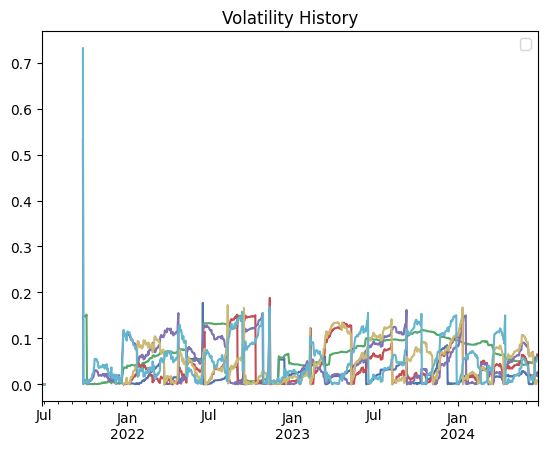

In [1]:
import os
import sys

class suppress_stdout_stderr(object):
    def __enter__(self):
        self.outnull_file = open(os.devnull, 'w')
        self.errnull_file = open(os.devnull, 'w')

        self.old_stdout_fileno_undup    = sys.stdout.fileno()
        self.old_stderr_fileno_undup    = sys.stderr.fileno()

        self.old_stdout_fileno = os.dup ( sys.stdout.fileno() )
        self.old_stderr_fileno = os.dup ( sys.stderr.fileno() )

        self.old_stdout = sys.stdout
        self.old_stderr = sys.stderr

        os.dup2 ( self.outnull_file.fileno(), self.old_stdout_fileno_undup )
        os.dup2 ( self.errnull_file.fileno(), self.old_stderr_fileno_undup )

        sys.stdout = self.outnull_file        
        sys.stderr = self.errnull_file
        return self

    def __exit__(self, *_):        
        sys.stdout = self.old_stdout
        sys.stderr = self.old_stderr

        os.dup2 ( self.old_stdout_fileno, self.old_stdout_fileno_undup )
        os.dup2 ( self.old_stderr_fileno, self.old_stderr_fileno_undup )

        os.close ( self.old_stdout_fileno )
        os.close ( self.old_stderr_fileno )

        self.outnull_file.close()
        self.errnull_file.close()

with suppress_stdout_stderr():
    from run_backtest import *
    parity_performances, asset_class_results = main(rebalance_frequency="1D", asset_class=None, csv_export=True)

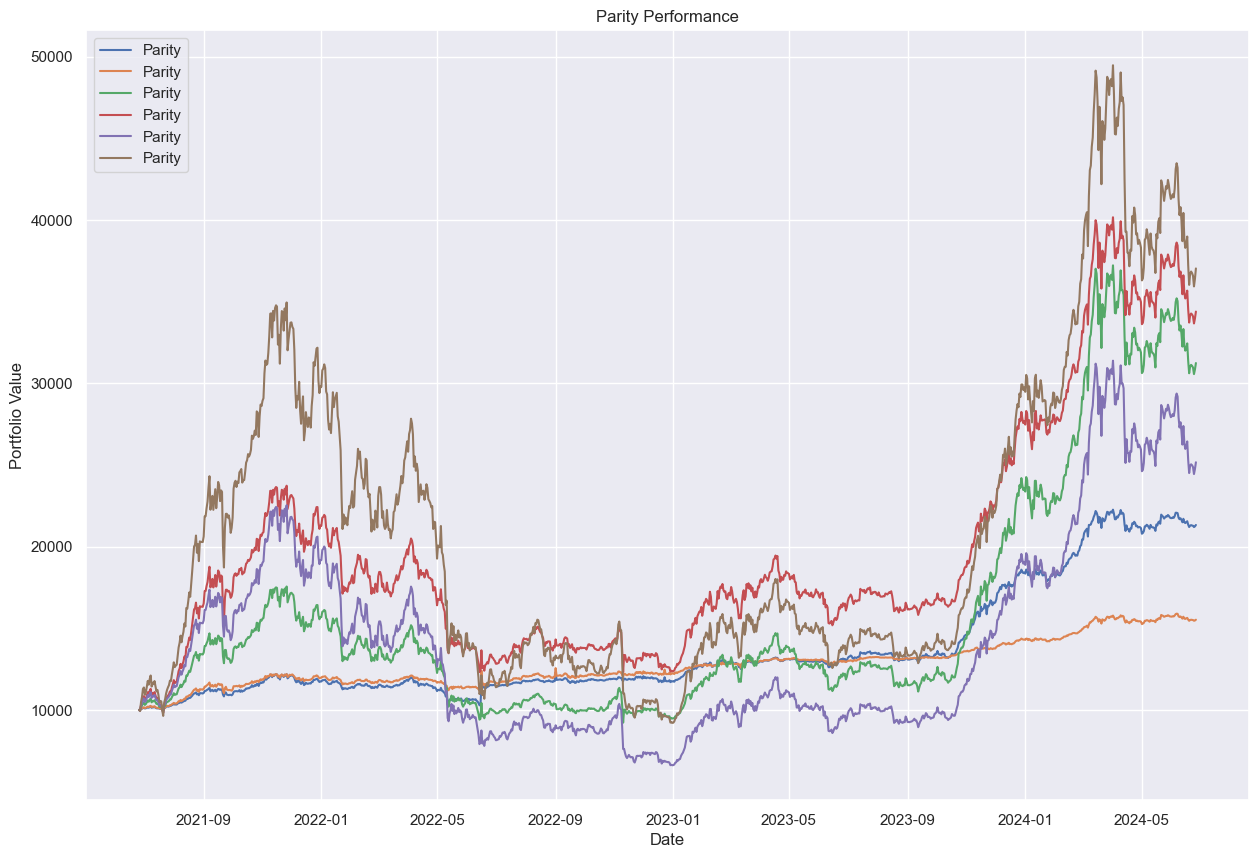

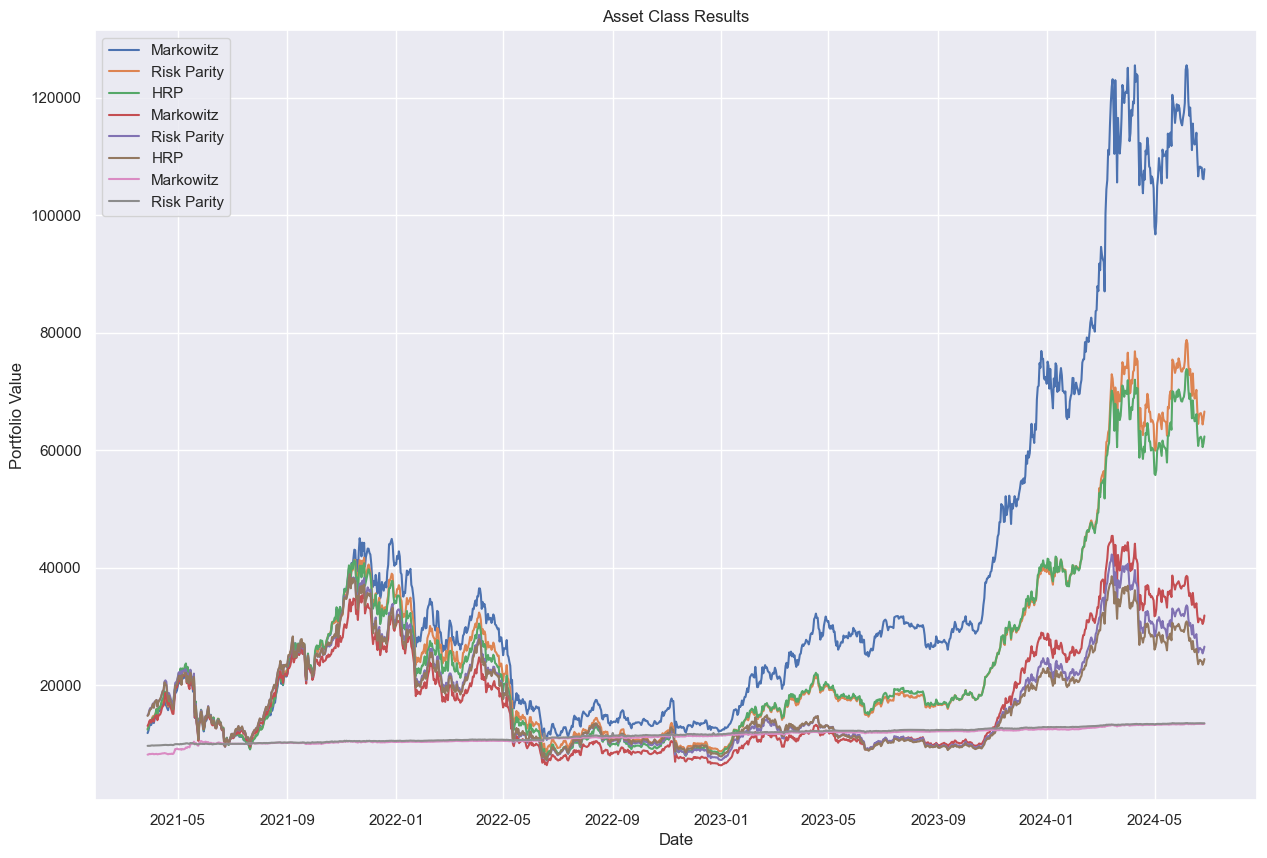

In [2]:
# Plot the performances
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

fig, ax = plt.subplots(figsize=(15, 10))

for i, performance in enumerate(parity_performances):
    ax.plot(performance.portfolio_value.index, performance.portfolio_value["Portfolio Value"], label=performance.name)

ax.legend()
ax.set_title("Parity Performance")
ax.set_xlabel("Date")
ax.set_ylabel("Portfolio Value")
plt.show()

# Plot the asset class results
fig, ax = plt.subplots(figsize=(15, 10))

for i, results in enumerate(asset_class_results):
    for performance in results:
        ax.plot(performance.portfolio_value.index, performance.portfolio_value["Portfolio Value"], label=performance.name)

ax.legend()
ax.set_title("Asset Class Results")
ax.set_xlabel("Date")
ax.set_ylabel("Portfolio Value")
plt.show()